
|time           | Wednesday                           | Thursday                                      | Friday                       |   
|---------------|:------------------------------------|:----------------------------------------------|:-----------------------------|
|   09:00-10.30 | Welcome                             | Python and suites                             | User interface (ecflow_ui)   |   
|   -           | Present your project and challenges | Lecture                                       | Lecture                      |   
|   -           | (flipped classroom)                 |    -                                          |    -                         |   
|   11:00-13:00 | Suite definition: going further     | Suite definition: advanced topics             | Exercises                    |   
|   -           | flipped classroom/Practical session | Practical session                             | Practical session 12.45: Q&A |  
|   14:00-15.15 | Project work                        | Tour of ECMWF operational and research suites |     -                        |  
|   -           | Practical session                   | Lecture                                       |     -                        |  
| 15.45 - 17:00 | Suite definition: going further     | Cookbook                                      |     -                        |  
|   -           | flipped classroom/Practical session | Practical session                             |               -              |


# ecflow 2019

# Variables

It is all about variables:
* python script used for definition
* suite variable
* variable present in the job
* variable used in the job

## Four key variables for jobs: ECF_PORT ECF_HOST ECF_NAME ECF_PASS
* ECF_PASS set to FREE, "free password" to attach a zombie or in monitoring mode

## Node specific variables: server, suite, family, task
* Server:
  * ECF_HOME, ECF_MICRO, ECF_PORT, ECF_CHECK, ECF_LOG, ECF_LIST
* Suite: ECF_FILES, ECF_INCLUDE, ECF_JOB_CMD, ECF_KILL_CMD, ECF_STATUS_CMD, ECF_TRIES
* Family: ECF_OUT, ECF_LOGPORT, ECF_LOGHOST
* Task: (ECF_HOST, ECF_PORT, ECF_NAME, ECF_PASS) (ECF_TRYNO, ECF_RID, ECF_TIMEOUT, NO_ECF)

## Trigger may refer to variable:
`` trigger /suite:TIME ge 0900 and (/suite:DATE % 100 eq 1)``

## compound variable: edit YMD %YYYY%%MM%01

# Panini metaphor

## a pinch of salt
``# suite.def``
``edit ECF_MICRO %``
`` Edit(ECF_MICRO="%")``

to give best taste to script templates

## meat or cheese (vegetarian) or cucumber (vegan)

``%includenopp <script.ksh>``

## decorate: salad, tomato, on top and bottom 
``%include <head.h>
%include <tail.h>``

## oil
  * may tune the job file
  * ``edit ECF_JOB_CMD "submit %ECF_JOB%"`` 
  * add queuing system directives
  * copy the (long) job file on the remote system
  * submit the (light) job file to the queuing system
    
    
## cook
* run

# Analogy with compiler

|compiler|ecflow|
|-|:-|
| preprocessor ``#if #else #endif`` | suite definition if/then/else|
    |``class``|  event + trigger on event set|
    |``if/then/else``|







In [1]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});
//        d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min' 
//javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

<IPython.core.display.Javascript object>

In [2]:
import IPython
from IPython.core.display import HTML

HTML('''<h1>Hello!</h1>''')

# from IPython.display import Javascript
# javascript
# Javascript("""
# """.format(df.to_json()))
# https://github.com/jacobstallone/D3-in-Jupyter-Notebook/blob/master/BAR%20CHART%20IN%20D3.ipynb

HTML("""
<!DOCTYPE html>
<meta charset="utf-8">
<title>Streamgraph</title>
<style>

body {
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  margin: 0;
  position: relative;
  width: 1400px;
}

button {
  position: absolute;
  right: 10px;
  top: 10px;
}

</style>
<button onclick="transition()">Update</button>
<script src="d3.js"></script>
<script>

var format = d3.time.format("%m/%d/%Y");

d3.csv("streamdata.csv", function(error, data) {
        data.forEach(function(d) {
            d.date = format.parse(d.date);
            d.y = d.num_visitors;
            d.x = d.index;

        });
        window.data = data;

        drawVisitorStats();
});

function drawVisitorStats(){
    var nest = d3.nest()
           .key(function(d){ return d.venue});
    var n = window.data.length, // number of layers, online, guestbook & museum

        stack = d3.layout.stack().offset("wiggle").offset("zero")
          .values(function(d) { return d.values; }),

        //group data by venue
        layers0 = stack(nest.entries(data)),
        layers1 = stack(nest.entries(data));

    var m = layers0[0].values.length; // number of samples per layer

    var yDomain = d3.max(layers0.concat(layers1), function(layer) { 
        return d3.max(layer, 
            function(d) { 
              return d.y0 + d.y; 
            }); 
    });

    var width = 1400,
        height = 800;

    var x = d3.scale.linear()
    .domain([0, m - 1])
    .range([0, width]);

    var y = d3.scale.linear()
    .domain([0, yDomain])
    .range([height, 0]);

    var color = d3.scale.linear()
        .range(["#ff0c00", "#ffc000"]);

    var area = d3.svg.area()
      .x(
        function(d) { 
          return x(d.x); 
        })
        .y0(function(d) { 
          return y(d.y0); 
        })
        .y1(function(d) { 
          return y(d.y0 + d.y); 
        }); 

    var svg = d3.select("body").append("svg")
        .attr("width", width)
        .attr("height", height);

    svg.selectAll("path")
        .data(layers0)
      .enter().append("path")
        .attr("d", function(d) { return area(d.values); })
        .style("fill", function() { return color(Math.random()); });
}
function transition() {
  d3.selectAll("path")
      .data(function() {
        var d = layers1;
        layers1 = layers0;
        return layers0 = d;
      })
    .transition()
      .duration(2500)
      .attr("d", area);
}
</script>
""")
# element.append("<div id='chart1'></div>");

from string import Template
import pandas as pd
import json, random

HTML('<script src="https://d3js.org/d3.v4.min.js"></script>')
filename = "https://gist.githubusercontent.com/mbostock/3887118/raw/2ab5b263223b099c4ded85c5a190790c427a10fc/data.tsv"
iris = pd.read_csv(filename, sep="\t")
iris.head()

iris_array_of_dict = iris.to_dict(orient="records")
iris_array_of_dict[:5]

# Css templet
css_text = '''

.bar {
  fill: steelblue;
}

.bar:hover {
  fill: brown;
}

.axis {
  font: 10px sans-serif;
}

.axis path,
.axis line {
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}

.x.axis path {
  display: none;
}

'''

#Java script templet
js_text_template = Template('''

var margin = {top: 20, right: 20, bottom: 30, left: 40},
    width = 500 - margin.left - margin.right,
    height = 300 - margin.top - margin.bottom;

var x = d3.scale.ordinal()
    .rangeRoundBands([0, width], .1);

var y = d3.scale.linear()
    .range([height, 0]);

var xAxis = d3.svg.axis()
    .scale(x)
    .orient("bottom");

var yAxis = d3.svg.axis()
    .scale(y)
    .orient("left");

var svg = d3.select("#graph-div").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var data = $data ;

  x.domain(data.map(function(d) { return d.letter; }));
  y.domain([0, d3.max(data, function(d) { return d.y; })]);

  svg.append("g")
      .attr("class", "x axis")
      .attr("transform", "translate(0," + height + ")")
      .call(xAxis);

  svg.append("g")
      .attr("class", "y axis")
      .call(yAxis);

  svg.selectAll(".bar")
      .data(data)
    .enter().append("rect")
      .attr("class", "bar")
      .attr("x", function(d) { return x(d.letter); })
      .attr("width", x.rangeBand())
      .attr("y", function(d) { return y(d.y); })
      .attr("height", function(d) { return height - y(d.y); });

''')

js_text_template_2 = Template('''

var bars = svg.selectAll(".bar").data($data);
  
bars
  .transition()
    .attr("y", function(d) { return y(d.y); })
    .attr("height", function(d) { return height - y(d.y); });

''')

#HTML templet
html_template = Template('''
<style> $css_text </style>
<div id="graph-div"></div>
<script> $js_text </script>
''')

data = pd.DataFrame({'letter': ['A','B','C','D'], 'y': [1,1,1,1]})
data.head()

,letter,y
0,A,1
1,B,1
2,C,1
3,D,1


In [3]:
HTML('<script src="https://d3js.org/d3.v4.min.js"></script>')
js_text = js_text_template.substitute({'data': json.dumps(data.to_dict(orient='records'))})
HTML(html_template.substitute({'css_text': css_text, 'js_text': js_text}))

In [4]:
data['y'] = [random.uniform(0,1) for d in data['y']]
js_text = js_text_template_2.substitute({
    'data': json.dumps(data.to_dict(orient='records'))})
print(js_text)
HTML('<script>' + js_text + '</script>')



var bars = svg.selectAll(".bar").data([{"letter": "A", "y": 0.0803259802572418}, {"letter": "B", "y": 0.3833578802549411}, {"letter": "C", "y": 0.0017417228670533191}, {"letter": "D", "y": 0.4613080463153112}]);
  
bars
  .transition()
    .attr("y", function(d) { return y(d.y); })
    .attr("height", function(d) { return height - y(d.y); });




In [5]:
import os, sys
p = os.getenv("HOME") + "/suites/o/def"
sys.path.append(p)
import inc_an as ia
s = ia.select_suite()
import ecf
defs = ecf.Defs()
defs.add(s)
tasks = [t for t in defs.real.get_all_tasks()]
def show_var(node):
    if node is None: return ""
    for v in node.variables:
        edit = "%s" % v
        elt = edit[5:].split()
        name = elt[0]
        value=edit[6+len(name):]
        print("%s=\"%%%s:%s%%\"" % (name, name, value[1:-1]))
    p = node.get_parent()
    return show_var(p)
    
# for t in tasks: print(t.get_abs_node_path(), show_var(t))
# s.draw_tree()
# s.draw_graph()
# print(ecf.to_json(s))

#MSG: choice an
<class 'inc_an.AnalysisSuite'>


In [6]:
%load_ext py_d3

In [7]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

/home/map/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


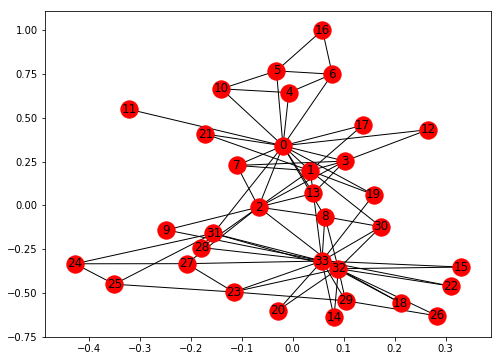

In [8]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [9]:
nodes = [{'name': str(i), 'club': g.node[i]['club']}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)

In [10]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [11]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.
  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

# ! sudo pip install pi_d3


<IPython.core.display.Javascript object>

In [12]:
# license
# https://opensource.org/licenses/GPL-3.0

HTML("""
<script>
chart = {
  const root = treemap(data);

  const svg = d3.select(DOM.svg(width, height))
      .style("width", "100%")
      .style("height", "auto")
      .style("font", "10px sans-serif");

  const leaf = svg.selectAll("g")
    .data(root.leaves())
    .enter().append("g")
      .attr("transform", d => `translate(${d.x0},${d.y0})`);

  leaf.append("title")
      .text(d => `${d.ancestors().reverse().map(d => d.data.name).join("/")}\n${format(d.value)}`);

  leaf.append("rect")
      .attr("id", d => (d.leafUid = DOM.uid("leaf")).id)
      .attr("fill", d => { while (d.depth > 1) d = d.parent; return color(d.data.name); })
      .attr("fill-opacity", 0.6)
      .attr("width", d => d.x1 - d.x0)
      .attr("height", d => d.y1 - d.y0);

  leaf.append("clipPath")
      .attr("id", d => (d.clipUid = DOM.uid("clip")).id)
    .append("use")
      .attr("xlink:href", d => d.leafUid.href);

  leaf.append("text")
      .attr("clip-path", d => d.clipUid)
    .selectAll("tspan")
    .data(d => d.data.name.split(/(?=[A-Z][^A-Z])/g).concat(format(d.value)))
    .enter().append("tspan")
      .attr("x", 3)
      .attr("y", (d, i, nodes) => `${(i === nodes.length - 1) * 0.3 + 1.1 + i * 0.9}em`)
      .attr("fill-opacity", (d, i, nodes) => i === nodes.length - 1 ? 0.7 : null)
      .text(d => d);

  return svg.node();
}

data = require("@observablehq/flare")

treemap = data => d3.treemap()
    .size([width, height])
    .padding(1)
    .round(true)
  (d3.hierarchy(data)
    .sum(d => d.size)
    .sort((a, b) => b.height - a.height || b.value - a.value))
    </script>""")

In [13]:
HTML("""
<!DOCTYPE html>
<style>

svg {
  font: 10px sans-serif;
}

a:hover tspan:first-child {
  text-decoration: underline;
}

tspan:last-child {
  font-size: 9px;
  fill-opacity: 0.7;
}

</style>
<svg width="960" height="960"></svg>
<script src="https://d3js.org/d3.v4.min.js"></script>
<script>

var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height");

var color = d3.scaleOrdinal(d3.schemeCategory20);

var format = d3.format(",d");

var treemap = d3.treemap()
    .size([width, height])
    .round(true)
    .padding(1);

var version = {
  "d3-array": "1.0.2",
  "d3-axis": "1.0.4",
  "d3-brush": "1.0.3",
  "d3-chord": "1.0.3",
  "d3-collection": "1.0.2",
  "d3-color": "1.0.2",
  "d3-dispatch": "1.0.2",
  "d3-drag": "1.0.2",
  "d3-dsv": "1.0.3",
  "d3-ease": "1.0.2",
  "d3-force": "1.0.4",
  "d3-format": "1.0.2",
  "d3-geo": "1.4.0",
  "d3-hierarchy": "1.0.3",
  "d3-interpolate": "1.1.2",
  "d3-path": "1.0.3",
  "d3-polygon": "1.0.2",
  "d3-quadtree": "1.0.2",
  "d3-queue": "3.0.3",
  "d3-random": "1.0.2",
  "d3-request": "1.0.3",
  "d3-scale": "1.0.4",
  "d3-selection": "1.0.3",
  "d3-shape": "1.0.4",
  "d3-time": "1.0.4",
  "d3-time-format": "2.0.3",
  "d3-timer": "1.0.3",
  "d3-transition": "1.0.3",
  "d3-voronoi": "1.1.0",
  "d3-zoom": "1.1.0"
};

d3.csv("d3.csv", function(d) {
  d.size = +d.size;
  return d;
}, function(error, data) {
  if (error) throw error;

  var root = d3.stratify()
      .id(function(d) { return d.path; })
      .parentId(function(d) { return d.path.substring(0, d.path.lastIndexOf("/")); })
    (data)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.height - a.height || b.value - a.value; });

  treemap(root);

  var cell = svg.selectAll("a")
    .data(root.leaves())
    .enter().append("a")
      .attr("target", "_blank")
      .attr("xlink:href", function(d) { var p = d.data.path.split("/"); return "https://github.com/" + p.slice(0, 2).join("/") + "/blob/v" + version[p[1]] + "/src/" + p.slice(2).join("/"); })
      .attr("transform", function(d) { return "translate(" + d.x0 + "," + d.y0 + ")"; });

  cell.append("rect")
      .attr("id", function(d) { return d.id; })
      .attr("width", function(d) { return d.x1 - d.x0; })
      .attr("height", function(d) { return d.y1 - d.y0; })
      .attr("fill", function(d) { var a = d.ancestors(); return color(a[a.length - 2].id); });

  cell.append("clipPath")
      .attr("id", function(d) { return "clip-" + d.id; })
    .append("use")
      .attr("xlink:href", function(d) { return "#" + d.id; });

  var label = cell.append("text")
      .attr("clip-path", function(d) { return "url(#clip-" + d.id + ")"; });

  label.append("tspan")
      .attr("x", 4)
      .attr("y", 13)
      .text(function(d) { return d.data.path.substring(d.data.path.lastIndexOf("/") + 1, d.data.path.lastIndexOf(".")); });

  label.append("tspan")
      .attr("x", 4)
      .attr("y", 25)
      .text(function(d) { return format(d.value); });

  cell.append("title")
      .text(function(d) { return d.id + "\n" + format(d.value); });
});

require(["d3"], function(d3) {
    window.d3 = d3;
});
</script>
""")
!pwd
!cat d3.csv

/home/map/201901/elearning-ep2
size,path
,d3
,d3/d3-array
,d3/d3-array/threshold
,d3/d3-axis
,d3/d3-brush
,d3/d3-chord
,d3/d3-collection
,d3/d3-color
,d3/d3-dispatch
,d3/d3-drag
,d3/d3-dsv
,d3/d3-ease
,d3/d3-force
,d3/d3-format
,d3/d3-geo
,d3/d3-geo/clip
,d3/d3-geo/path
,d3/d3-geo/projection
,d3/d3-hierarchy
,d3/d3-hierarchy/hierarchy
,d3/d3-hierarchy/pack
,d3/d3-hierarchy/treemap
,d3/d3-interpolate
,d3/d3-interpolate/transform
,d3/d3-path
,d3/d3-polygon
,d3/d3-quadtree
,d3/d3-queue
,d3/d3-random
,d3/d3-request
,d3/d3-scale
,d3/d3-selection
,d3/d3-selection/selection
,d3/d3-shape
,d3/d3-shape/curve
,d3/d3-shape/offset
,d3/d3-shape/order
,d3/d3-shape/symbol
,d3/d3-time-format
,d3/d3-time
,d3/d3-timer
,d3/d3-transition
,d3/d3-transition/selection
,d3/d3-transition/transition
,d3/d3-voronoi
,d3/d3-zoom
90,d3/d3-array/array.js
86,d3/d3-array/ascending.js
238,d3/d3-array/bisect.js
786,d3/d3-array/bisector.js
72,d3/d3-array/constant.js
86,d3/d3-array/descending.js
135,d3/d3-array/deviation.j

In [14]:
HTML("""
<script>
var w = 960,
     h = 500,
     color = d3.scale.category20c();
 
 var treemap = d3.layout.treemap()
     .size([w, h])
     .sticky(true)
     .value(function(d) { return d.size; });
 
 var div = d3.select("#chart").append("div")
     .style("position", "relative")
     .style("width", w + "px")
     .style("height", h + "px");
 
 d3.json("./data/flare.json", function(json) {
   div.data([json]).selectAll("div")
       .data(treemap.nodes)
     .enter().append("div")
       .attr("class", "cell")
       .style("background", function(d) { return d.children ? color(d.name) : null; })
       .call(cell)
       .text(function(d) { return d.children ? null : d.name; });
 
   d3.select("#size").on("click", function() {
     div.selectAll("div")
         .data(treemap.value(function(d) { return d.size; }))
       .transition()
         .duration(1500)
         .call(cell);
 
     d3.select("#size").classed("active", true);
     d3.select("#count").classed("active", false);
   });
 
   d3.select("#count").on("click", function() {
     div.selectAll("div")
         .data(treemap.value(function(d) { return 1; }))
       .transition()
         .duration(1500)
         .call(cell);
 
     d3.select("#size").classed("active", false);
     d3.select("#count").classed("active", true);
   });
 });
 
 function cell() {
   this
       .style("left", function(d) { return d.x + "px"; })
       .style("top", function(d) { return d.y + "px"; })
       .style("width", function(d) { return d.dx - 1 + "px"; })
       .style("height", function(d) { return d.dy - 1 + "px"; });
 }
</script>
""")

In [15]:
HTML("""
<!DOCTYPE html>
<p id="greeting"></p>
<script type="module">
import {Runtime, Inspector, Library} from "https://unpkg.com/@observablehq/notebook-runtime?module";
import notebook from "https://api.observablehq.com/d/6c9b7fd62ca784c0.js";
// Rewrite the notebook to redefine the “subject” cell in the main module.
const override = {
  id: notebook.id,
  modules: notebook.modules.map(module => {
    if (module.id !== notebook.id) return module;
    return {
      id: module.id,
      variables: module.variables.map(variable => {
        if (variable.name !== "subject") return variable;
        return {
          name: variable.name,
          inputs: [],
          value: () => "Fred"
        };
      })
    };
  })
};
Runtime.load(override, new Library, cell => {
  if (cell.name === "greeting") {
    return new Inspector(document.querySelector("#greeting"));
  }
});
</script>
""")

# Parallel processing with Python
[link](https://wiki.python.org/moin/ParallelProcessing)

# template engine with Python
* [jinja](jinja.pocoo.org): %extend %block %for
    * template inheritance

In [16]:
import multiprocessing as mp
import random
import string
random.seed(31415)
# Define an output queue
out = mp.Queue()

def rand(length, out):
    """ Generates a string. """
    res = ''.join(random.choice(
                        string.ascii_lowercase
                        + string.ascii_uppercase
                        + string.digits)
                   for i in range(length))
    out.put(res)

# Setup a list of processes that we want to run
proc = [mp.Process(target=rand, args=(8, out)) for x in range(7)]
# Run processes
for p in proc: p.start()
# Exit the completed processes
for p in proc: p.join()

# Get process results from the output queue
results = [out.get() for p in proc]
print(results)

['vz9BaH7E', 'a2UuM87g', 'L4SfenXH', 'TV32UD9Y', 'Rehc80l6', 'nQdldjnu', 'VQYWI09C']


In [17]:
# thanks https://sebastianraschka.com/Articles/2014_multiprocessing.html
import multiprocessing as mp
import random
import string

random.seed(123)

# Define an output queue
output = mp.Queue()

# define a example function
def rand_string(length, output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    rand_str = ''.join(random.choice(
                        string.ascii_lowercase
                        + string.ascii_uppercase
                        + string.digits)
                   for i in range(length))
    output.put(rand_str)

# Setup a list of processes that we want to run
processes = [mp.Process(target=rand_string, args=(5, output)) for x in range(4)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]

print(results)


['rFQ4a', 'yk0yY', '0atIp', 'LXOdS']


* with ecflow: variables, %include, %nopp %includenopp %manual %comment %end

# Graphs

* [gephi](https://gephi.org/features/) [download](https://gephi.org/users/download/)
* [IBM Spark](https://developer.ibm.com/clouddataservices/2016/07/15/intro-to-apache-spark-graphframes/)
* [Pyspark](https://pysparktutorial.blogspot.com/2017/10/graphframes-pyspark.html)
* [Egoweb](https://github.com/qualintitative/egoweb.git)
    
format
* [gexf](https://gephi.org/gexf/1.2draft/gexf-12draft-primer.pdf)
    